In [1]:
# 기본 패키지 불러오기 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
import matplotlib as mpl
from matplotlib import font_manager, rc

# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 글꼴 경로 지정
font_path = '../../../../data/malgun.ttf'  # 윈도우에 설치된 맑은 고딕 폰트 경로

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

In [2]:
# 데이터 불러오기

path = '../../../../data/Airbnb_London/listings.csv'

london_lists = pd.read_csv(path)

# 1차 선별한 컬럼 25개 중 22개 2차 선별 + 1개(숙소_예약가능_여부)
# 최근 리뷰가 작성되었는지를 보기 위해 2개 컬럼 추가_240529 >> 'number_of_reviews_ltm' // 'last_review'
# URL 컬럼 london_lists에 적용_240530

columns_selected = ['id', 'listing_url', 'host_id', 'host_is_superhost', 'neighbourhood_cleansed', 'property_type', \
    'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'has_availability', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'last_review', 'review_scores_rating', 'review_scores_accuracy', \
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']

# 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'minimum_nights', 'maximum_nights', 'has_availability',

# 선별한 컬럼만 적용
london_lists = london_lists[columns_selected]

# 변수 정리 
london_lists = london_lists.rename(columns={
    'id': '숙소_id',
    'listing_url' : '숙소_url',
    'host_id': '호스트_id',
    # 'host_response_time': '답변_평균시간',
    # 'host_response_rate': '문의_응답률',
    # 'host_acceptance_rate': '예약_수락률',
    'host_is_superhost': '슈퍼호스트',
    # 'host_total_listings_count': '숙소_수',
    # 'host_has_profile_pic' : '프로필_사진',
    # 'host_identity_verified' : '호스트_신원',
    'neighbourhood_cleansed': '숙소_지역',
    'property_type' : '숙소_특징',
    'room_type': '숙소_유형',
    'accommodates': '수용_인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    # 'minimum_nights': '최소_숙박일',
    # 'maximum_nights': '최대_숙박일',
    'has_availability' : '예약_가능여부',
    'number_of_reviews': '리뷰수',
    'number_of_reviews_ltm' : '12개월_리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'last_review' : '마지막_리뷰',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수'
 
})

temp = london_lists.copy()
raw = london_lists.copy()

# 컬럼명 확인
london_lists.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90852 entries, 0 to 90851
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_id        90852 non-null  int64  
 1   숙소_url       90852 non-null  object 
 2   호스트_id       90852 non-null  int64  
 3   슈퍼호스트        90463 non-null  object 
 4   숙소_지역        90852 non-null  object 
 5   숙소_특징        90852 non-null  object 
 6   숙소_유형        90852 non-null  object 
 7   수용_인원수       90852 non-null  int64  
 8   욕실수          57894 non-null  float64
 9   침실수          78118 non-null  float64
 10  침대수          57837 non-null  float64
 11  편의시설         90852 non-null  object 
 12  숙소_가격        57885 non-null  object 
 13  예약_가능여부      86773 non-null  object 
 14  리뷰수          90852 non-null  int64  
 15  12개월_리뷰수     90852 non-null  int64  
 16  30일_리뷰수      90852 non-null  int64  
 17  마지막_리뷰       65869 non-null  object 
 18  리뷰점수         65869 non-null  float64
 19  숙소_정

In [3]:
# 리뷰수가 0인 컬럼 조건 
condition_review_0 = london_lists['리뷰수'] == 0

# 별도의 DF로 저장
london_lists_review_0 = london_lists[condition_review_0]

# 리뷰 개수가 0이 아닌 컬럼 조건 설정
condition_review = london_lists['리뷰수'] != 0

# 리뷰 개수가 0이 아닌 컬럼으로 df 업데이트 
london_lists = london_lists[condition_review]
temp = london_lists.copy()

#숙소 유형 제거 
# 조건 설정
condition_room_entirehomeapt = london_lists['숙소_유형'] == 'Entire home/apt'
condition_room_privateroom = london_lists['숙소_유형'] == 'Private room'

# 데이터 제거
london_lists = london_lists[(condition_room_entirehomeapt | condition_room_privateroom)]

# 예약가능여부 결측치 제거
london_lists = london_lists[london_lists["예약_가능여부"].notnull()]


# 가격이 null값/notnull값 조건 생성 
condition_price_notnull = london_lists['숙소_가격'].notnull()
condition_price_null = london_lists['숙소_가격'].isnull()

# 가격이 null값/null값이 아닌 df 분리
london_lists_price = london_lists[condition_price_notnull] 
london_lists_price_null = london_lists[condition_price_null]

# 변수명 정리 널값이 아닌 데이터
london_lists = london_lists_price

#슈퍼호스트 결측치 제거
london_lists = london_lists.dropna(subset=['슈퍼호스트'])

#욕실,침대,침실수 결측츠제거
london_lists = london_lists.dropna(subset=['욕실수', '침실수', '침대수'])

#리뷰점수 결측치제거
london_lists = london_lists.dropna(subset=['숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수'])

#12개월 리뷰수 0인것 제거 
london_lists = london_lists[london_lists['12개월_리뷰수'] != 0]

london_lists['숙소_가격'] = london_lists['숙소_가격'].str.lstrip('$').str.replace(',', '').astype('float')

#가격이 0 인값 제거 
london_lists = london_lists[london_lists['숙소_가격'] != 0.0]

In [4]:
london_lists.shape

(38769, 26)

이상치 처리 

In [5]:
#수용 인원수 이상치 제거 

import pandas as pd


# 이상치를 제거하는 함수 정의
def remove_price_outliers(df, price_column, type):
    
    condition = (df['숙소_유형'] == type)
    
    if price_column != '숙소_가격':
        Q1 = df[price_column].quantile(0.25)
        Q3 = df[price_column].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR

        
        outlier = df[price_column][condition] > upper_bound
        upper_outlier = df[condition][outlier]
        
        upper_outlier_indices = upper_outlier.index
        london_lists_cleaned = df.drop(index=upper_outlier_indices, inplace=True)
        df = london_lists_cleaned
        return df 
    else:
        Q1 = df[price_column].quantile(0.25)
        Q3 = df[price_column].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 3 * IQR

        
        outlier = df[price_column][condition] > upper_bound
        upper_outlier = df[condition][outlier]
        
        upper_outlier_indices = upper_outlier.index
        london_lists_cleaned = df.drop(index=upper_outlier_indices, inplace=True)
        df = london_lists_cleaned
        return df 
# 숙소 가격의 이상치 제거
remove_price_outliers(london_lists, '수용_인원수', 'Entire home/apt')
remove_price_outliers(london_lists, '수용_인원수', 'Private room')
remove_price_outliers(london_lists, '숙소_가격', 'Entire home/apt')
remove_price_outliers(london_lists, '숙소_가격', 'Private room')



In [6]:
london_lists.shape # 36407개가 되어야함

(36407, 26)

게스트 선호 기준 <br>

1. 평점 4.9이상 
2. 2년간 후기 개수 5개 이상 
3. 신뢰도 1% 미만 (호스트의 예약 취소율) --> 슈퍼호스트로 대체

슈퍼호스트가 t인데도 리뷰점수가 4.8 미만인값 제외하고 진행함 

In [7]:
# 리뷰점수가 4.8미만인데 슈퍼호스트가 t
london_lists[(london_lists['슈퍼호스트'] == 't') & (london_lists['리뷰점수'] < 4.8)]['슈퍼호스트']

3        t
4        t
7        t
19       t
21       t
        ..
88272    t
88342    t
88558    t
88748    t
90451    t
Name: 슈퍼호스트, Length: 2044, dtype: object

In [8]:
london_lists['슈퍼호스트'].value_counts()

슈퍼호스트
f    26221
t    10186
Name: count, dtype: int64

In [9]:
# 슈퍼호스트를 f로 바꿈 
london_lists.loc[(london_lists['슈퍼호스트'] == 't') & (london_lists['리뷰점수'] < 4.8), '슈퍼호스트'] = 'f'

In [10]:
london_lists['슈퍼호스트'].value_counts()

슈퍼호스트
f    28265
t     8142
Name: count, dtype: int64

In [11]:
london_lists[(london_lists['리뷰점수'] >= 4.9) & (london_lists['리뷰수'] >= 5) & (london_lists['슈퍼호스트'] =='t')]

,숙소_id,숙소_url,호스트_id,슈퍼호스트,숙소_지역,숙소_특징,숙소_유형,수용_인원수,욕실수,침실수,...,30일_리뷰수,마지막_리뷰,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수
0,312761,https://www.airbnb.com/rooms/312761,1608226,t,Hackney,Entire rental unit,Entire home/apt,2,1.0,1.0,...,0,2024-02-03,4.96,4.97,4.93,4.96,5.00,4.89,4.93,0.86
26,38995,https://www.airbnb.com/rooms/38995,167281,t,Southwark,Private room in rental unit,Private room,2,1.0,1.0,...,0,2023-12-09,4.96,4.93,5.00,4.96,4.98,4.74,4.89,0.92
34,183128,https://www.airbnb.com/rooms/183128,878083,t,Southwark,Private room in condo,Private room,1,1.0,1.0,...,3,2024-03-20,4.98,5.00,4.98,4.99,4.99,4.85,4.96,1.37
53,203163,https://www.airbnb.com/rooms/203163,460272,t,Southwark,Private room in condo,Private room,1,1.0,1.0,...,2,2024-03-07,4.90,4.91,4.92,4.94,4.96,4.89,4.84,0.77
76,329585,https://www.airbnb.com/rooms/329585,1645632,t,Lambeth,Entire condo,Entire home/apt,2,1.0,1.0,...,1,2024-03-11,4.97,4.91,4.99,4.99,4.98,4.78,4.87,1.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85679,1078110931249779978,https://www.airbnb.com/rooms/1078110931249779978,252793730,t,Hammersmith and Fulham,Entire home,Entire home/apt,5,0.0,0.0,...,1,2024-02-25,5.00,5.00,5.00,5.00,5.00,5.00,5.00,2.83
85779,1079549946263928611,https://www.airbnb.com/rooms/1079549946263928611,131418248,t,Camden,Private room in condo,Private room,2,1.0,1.0,...,8,2024-03-17,5.00,5.00,4.92,5.00,5.00,4.92,4.92,8.48
85932,1080459201480971250,https://www.airbnb.com/rooms/1080459201480971250,131418248,t,Camden,Private room in condo,Private room,2,1.0,1.0,...,7,2024-03-11,5.00,5.00,5.00,5.00,5.00,5.00,5.00,7.67
85938,1080467890834061925,https://www.airbnb.com/rooms/1080467890834061925,131418248,t,Camden,Private room in condo,Private room,2,1.0,1.0,...,5,2024-03-18,5.00,5.00,5.00,4.67,5.00,4.83,4.67,4.39


게스트 선호 컬럼 생성 (t. f)<br>
조건에 맞는 게스트 선호 값을 t로 나머지 f 

In [12]:
# 새로운 '게스트선호' 컬럼을 추가하고 기본값으로 'f' 설정
london_lists['게스트선호'] = 'f'

In [13]:
# 조건에 맞는 행의 '게스트선호' 값을 't'로 변경
london_lists.loc[(london_lists['리뷰점수'] >= 4.9) & (london_lists['리뷰수'] >= 5) & (london_lists['슈퍼호스트'] == 't'), '게스트선호'] = 't'

In [14]:
london_lists['게스트선호'].value_counts()

게스트선호
f    31976
t     4431
Name: count, dtype: int64

EDA 

In [15]:
london_lists.groupby('게스트선호')['리뷰점수'].agg(['mean','count'])

,mean,count
게스트선호,,
f,4.656365,31976
t,4.960122,4431


게스트선호
f    136.550382
t    131.448206
Name: 숙소_가격, dtype: float64


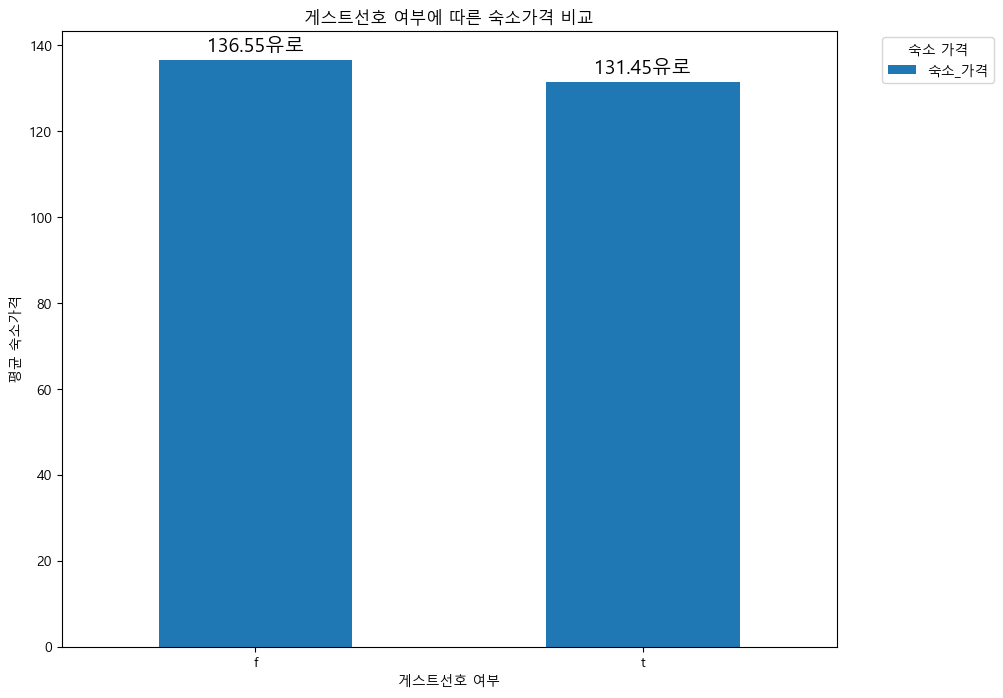

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 슈퍼호스트별로 각 리뷰 점수의 평균을 계산
review_scores = london_lists.groupby('게스트선호')[
    '숙소_가격'].mean()

print(review_scores)

# 시각화
ax = review_scores.plot(kind='bar', figsize=(10, 8))
plt.title('게스트선호 여부에 따른 숙소가격 비교')
plt.xlabel('게스트선호 여부')
plt.ylabel('평균 숙소가격')
plt.xticks(rotation=0)
plt.legend(title='숙소 가격', bbox_to_anchor=(1.05, 1), loc='upper left')

# 각 막대 위에 값 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}유로', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=14)
    
plt.show()

게스트선호
f    4.656365
t    4.960122
Name: 리뷰점수, dtype: float64


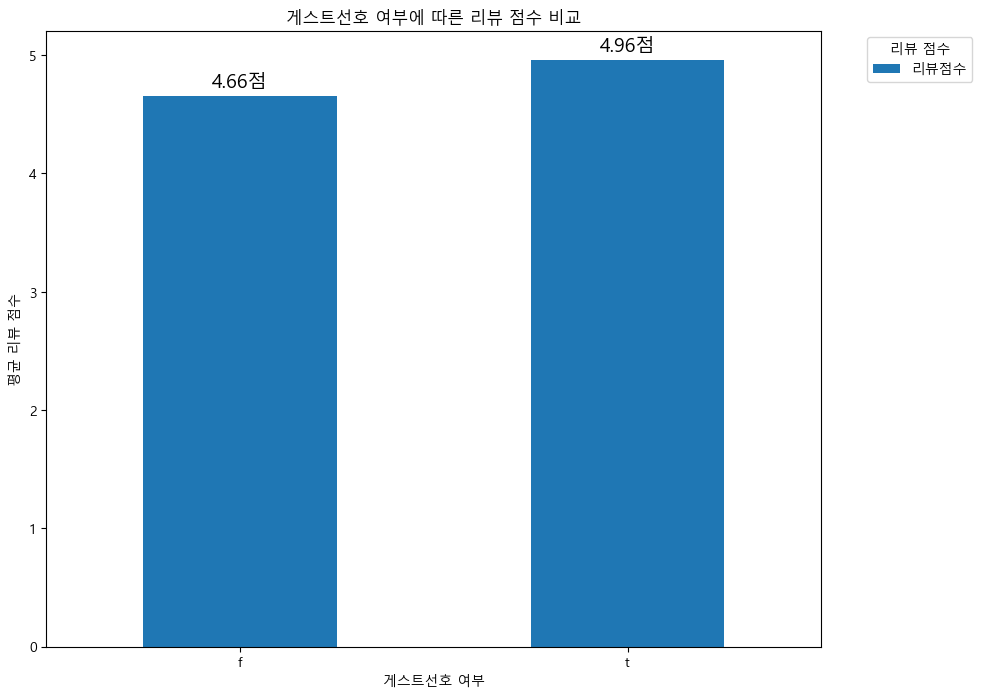

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 슈퍼호스트별로 각 리뷰 점수의 평균을 계산
review_scores = london_lists.groupby('게스트선호')[
    '리뷰점수'].mean()

print(review_scores)

# 시각화
ax = review_scores.plot(kind='bar', figsize=(10, 8))
plt.title('게스트선호 여부에 따른 리뷰 점수 비교')
plt.xlabel('게스트선호 여부')
plt.ylabel('평균 리뷰 점수')
plt.xticks(rotation=0)
plt.legend(title='리뷰 점수', bbox_to_anchor=(1.05, 1), loc='upper left')

# 각 막대 위에 값 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}점', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=14)
    
plt.show()

       숙소_정확성_리뷰점수  숙소_청결도_리뷰점수  숙소_체크인_리뷰점수  숙소_소통_리뷰점수  숙소_위치_리뷰점수  \
게스트선호                                                                  
f         4.696988     4.632015     4.762741    4.794647    4.716287   
t         4.944841     4.918280     4.948278    4.972255    4.858357   

       숙소_가격_리뷰점수  
게스트선호              
f        4.570471  
t        4.863191  


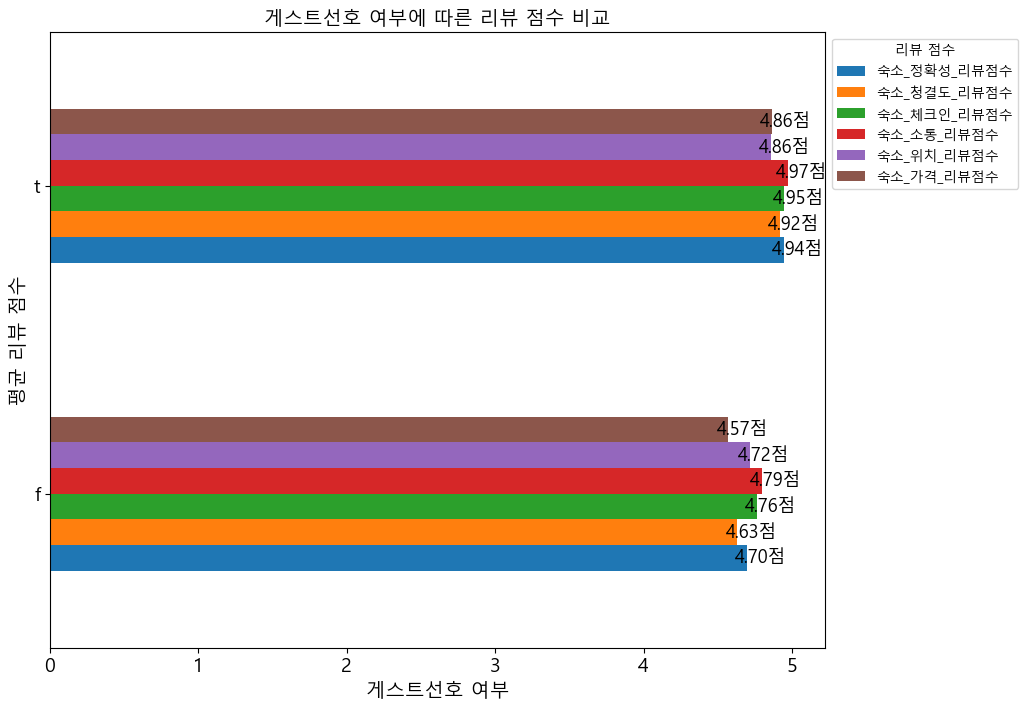

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 슈퍼호스트별로 각 리뷰 점수의 평균을 계산
review_scores = london_lists.groupby('게스트선호')[[
    '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', 
    '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', 
    '숙소_위치_리뷰점수', '숙소_가격_리뷰점수']].mean()

print(review_scores)

# 시각화
ax = review_scores.plot(kind='barh', figsize=(10, 8))
plt.title('게스트선호 여부에 따른 리뷰 점수 비교',fontsize=14)
plt.xlabel('게스트선호 여부',fontsize=14)
plt.ylabel('평균 리뷰 점수', fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(rotation=0, fontsize=14)

plt.legend(title='리뷰 점수', bbox_to_anchor=(1., 1), loc='upper left')

# 각 막대 위에 값 표시
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}점', (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='center', va='center', xytext=(10, 0), textcoords='offset points', fontsize=13)
    
plt.show()

게스트선호인 숙소는 리뷰수가 0-600개가 많고 리뷰점수는 4.9점이상 <br>
게스트선호가 아닌 숙소는 전체적으로 다양하게 분포 <br>


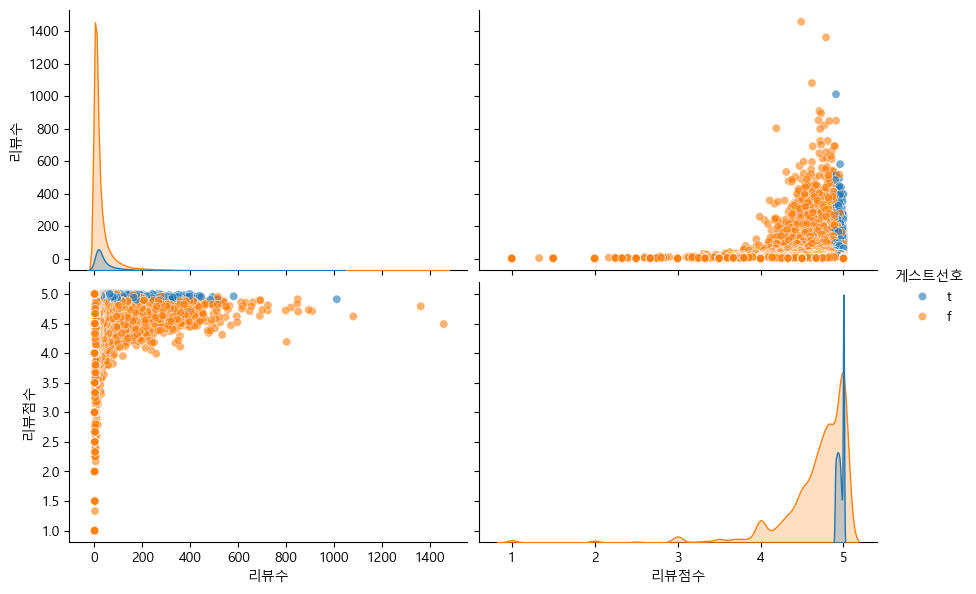

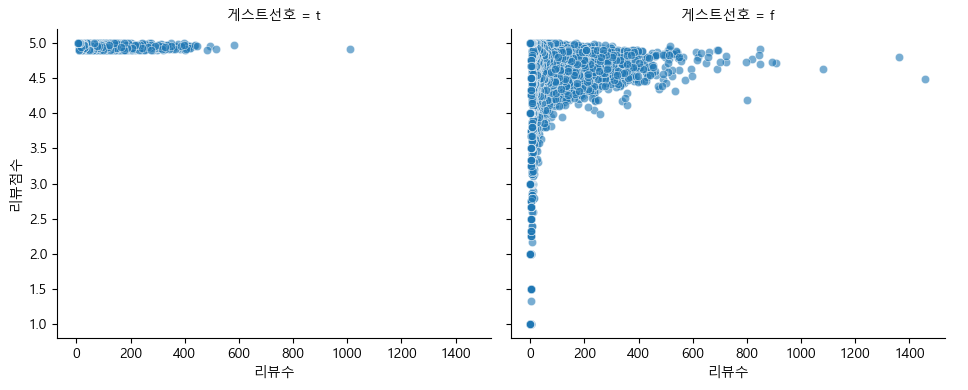

In [19]:

sns.pairplot(london_lists, vars=['리뷰수', '리뷰점수'], hue='게스트선호', height=3, aspect=1.5, plot_kws={'alpha':0.6})
plt.show()


g = sns.FacetGrid(london_lists, col='게스트선호', height=4, aspect=1.2)
g.map(sns.scatterplot, '리뷰수', '리뷰점수', alpha=0.6)
g.add_legend()
plt.show()

게스트선호가 t인 숙소는 가격이 싼 숙소가 많고 비싸질수록 적어지는 것을 볼수 있다 <br>
그에 비해 게스트선호가 f인 숙소는 특정 가격 골고루 분포하고 있다

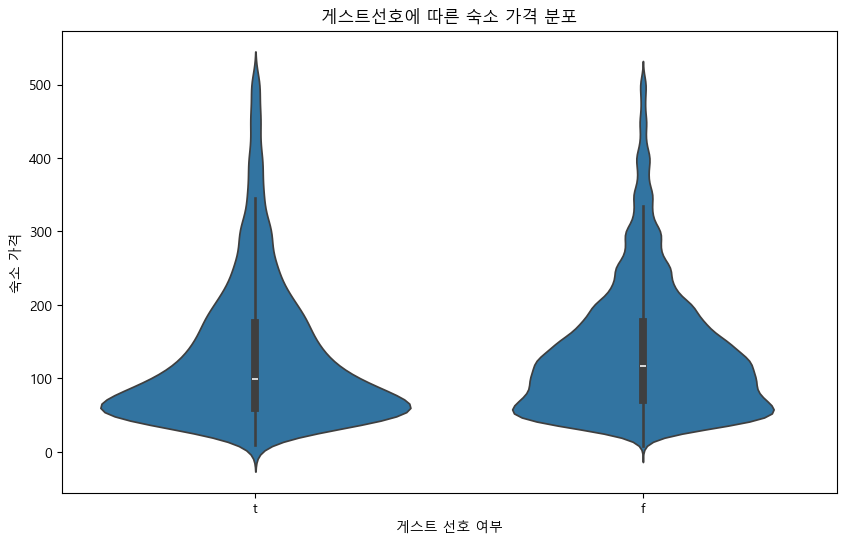

In [20]:

# 바이올린 플롯 생성
plt.figure(figsize=(10, 6))
sns.violinplot(x='게스트선호', y='숙소_가격', data=london_lists)
plt.title('게스트선호에 따른 숙소 가격 분포')
plt.xlabel('게스트 선호 여부')
plt.ylabel('숙소 가격')
plt.show()

게스트선호인 숙소의 숙소 유형별 숙소수

숙소_유형
Entire home/apt    2258
Private room       2173
Name: count, dtype: int64


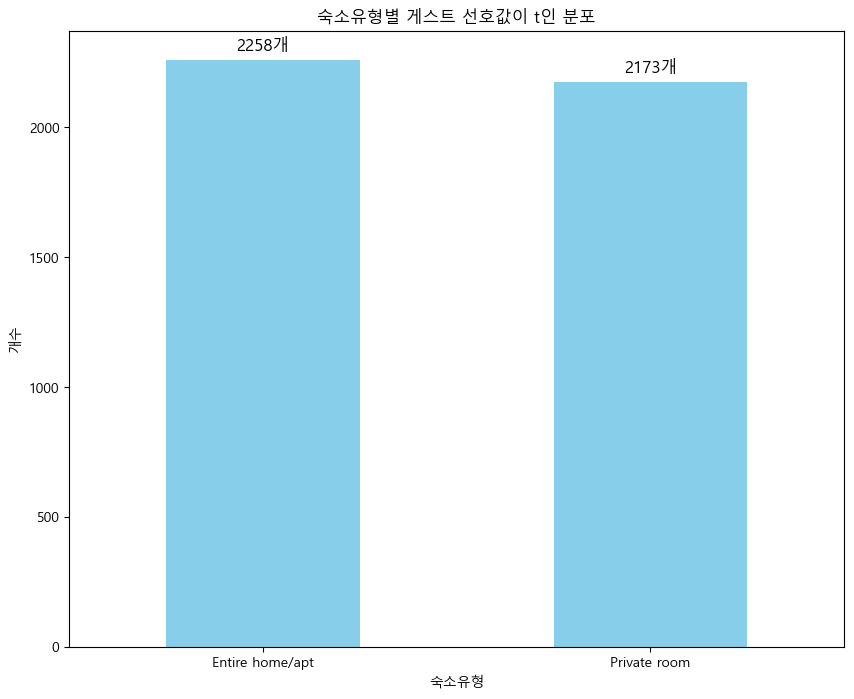

In [21]:
# '게스트선호'가 't'인 데이터 필터링
guest_preference_t = london_lists[london_lists['게스트선호'] == 't']

# 숙소유형별 '게스트선호'가 't'인 행의 수 계산
distribution = guest_preference_t['숙소_유형'].value_counts()

# 결과 출력
print(distribution)

# 시각화
ax = distribution.plot(kind='bar', figsize=(10, 8), color='skyblue')
plt.title('숙소유형별 게스트 선호값이 t인 분포')
plt.xlabel('숙소유형')
plt.ylabel('개수')
plt.xticks(rotation=0)

# 각 막대 위에 값 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height()}개', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.show()

숙소_유형
Entire home/apt    21593
Private room       10383
Name: count, dtype: int64


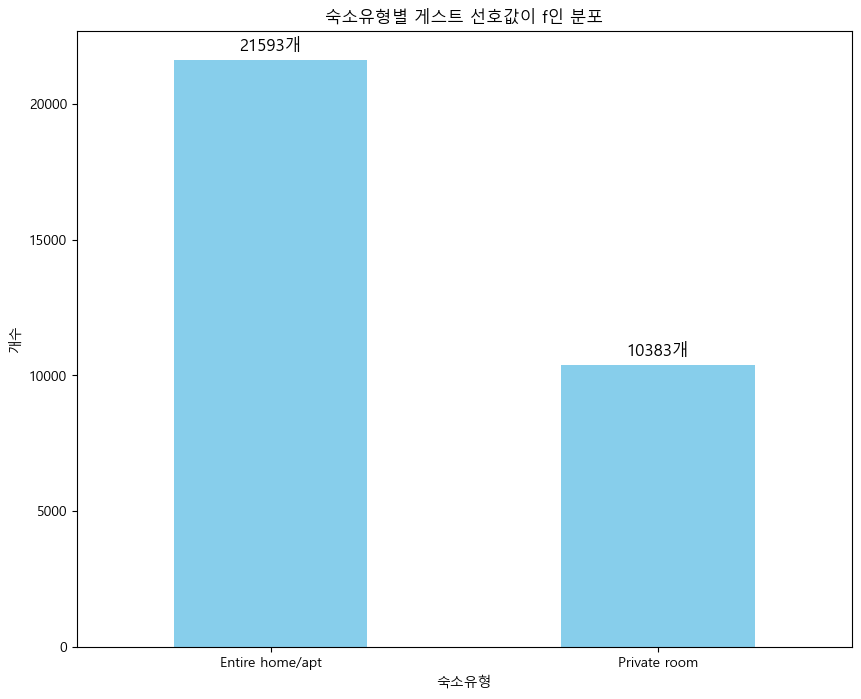

In [22]:
# '게스트선호'가 't'인 데이터 필터링
guest_preference_t = london_lists[london_lists['게스트선호'] == 'f']

# 숙소유형별 '게스트선호'가 't'인 행의 수 계산
distribution = guest_preference_t['숙소_유형'].value_counts()

# 결과 출력
print(distribution)

# 시각화
ax = distribution.plot(kind='bar', figsize=(10, 8), color='skyblue')
plt.title('숙소유형별 게스트 선호값이 f인 분포')
plt.xlabel('숙소유형')
plt.ylabel('개수')
plt.xticks(rotation=0)

# 각 막대 위에 값 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height()}개', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.show()

In [23]:
london_lists.columns

Index(['숙소_id', '숙소_url', '호스트_id', '슈퍼호스트', '숙소_지역', '숙소_특징', '숙소_유형',
       '수용_인원수', '욕실수', '침실수', '침대수', '편의시설', '숙소_가격', '예약_가능여부', '리뷰수',
       '12개월_리뷰수', '30일_리뷰수', '마지막_리뷰', '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수',
       '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수',
       '게스트선호'],
      dtype='object')

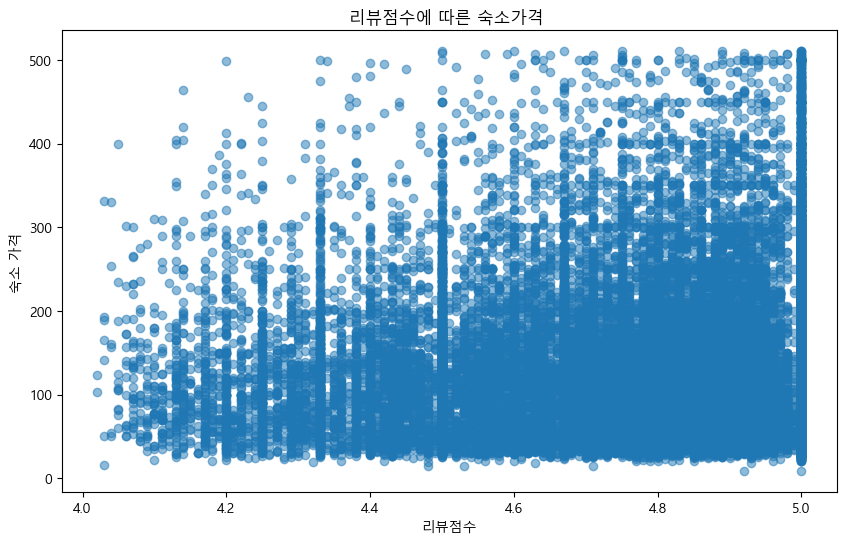

In [24]:
# 숙소 가격과 수용가능한 최대 인원수 사이의 관계 탐색
plt.figure(figsize=(10, 6))
plt.scatter(london_lists[london_lists['리뷰점수']> 4]['리뷰점수'], london_lists[london_lists['리뷰점수']> 4]['숙소_가격'], alpha=0.5)
plt.title('리뷰점수에 따른 숙소가격 ')
plt.xlabel('리뷰점수')
plt.ylabel('숙소 가격')
plt.show()

숙소가격에 따른 욕실수 침실수 침대수 를 알아보자 

In [25]:
london_lists['숙소_가격'].describe()

count    36407.000000
mean       135.929409
std         88.856643
min          8.000000
25%         69.000000
50%        115.000000
75%        176.000000
max        510.000000
Name: 숙소_가격, dtype: float64

In [26]:
london_lists[london_lists['숙소_가격'] <= 135.0].count() # 21982개
london_lists[(london_lists['숙소_가격'] > 135.0) & (london_lists['숙소_가격'] <= 510.0)].count() # 14425개

숙소_id          14425
숙소_url         14425
호스트_id         14425
슈퍼호스트          14425
숙소_지역          14425
숙소_특징          14425
숙소_유형          14425
수용_인원수         14425
욕실수            14425
침실수            14425
침대수            14425
편의시설           14425
숙소_가격          14425
예약_가능여부        14425
리뷰수            14425
12개월_리뷰수       14425
30일_리뷰수        14425
마지막_리뷰         14425
리뷰점수           14425
숙소_정확성_리뷰점수    14425
숙소_청결도_리뷰점수    14425
숙소_체크인_리뷰점수    14425
숙소_소통_리뷰점수     14425
숙소_위치_리뷰점수     14425
숙소_가격_리뷰점수     14425
평균_리뷰수         14425
게스트선호          14425
dtype: int64

In [27]:
price_135 = london_lists[london_lists['숙소_가격'] <= 135.0] 
price_510 = london_lists[(london_lists['숙소_가격'] > 135.0) & (london_lists['숙소_가격'] <= 510.0)]

            욕실수       침실수       침대수
게스트선호                              
f      1.175859  1.084165  1.329291
t      1.170347  1.059236  1.175955


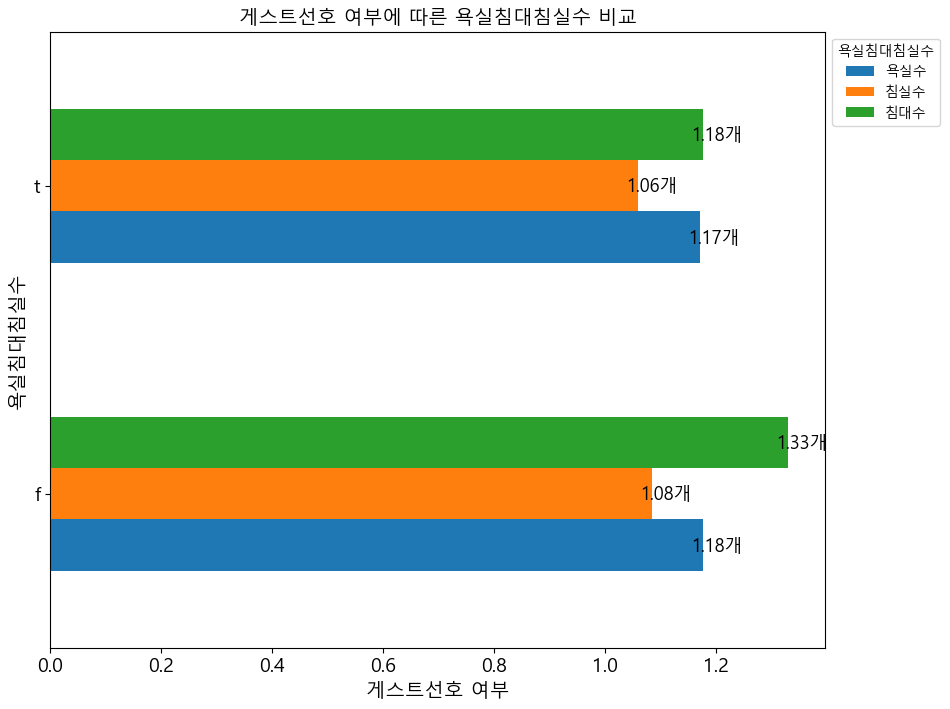

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# 슈퍼호스트별로 각 리뷰 점수의 평균을 계산
review_scores = price_135.groupby('게스트선호')[['욕실수','침실수','침대수']].mean()

print(review_scores)

# 시각화
ax = review_scores.plot(kind='barh', figsize=(10, 8))
plt.title('게스트선호 여부에 따른 욕실침대침실수 비교',fontsize=14)
plt.xlabel('게스트선호 여부',fontsize=14)
plt.ylabel('욕실침대침실수', fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(rotation=0, fontsize=14)

plt.legend(title='욕실침대침실수', bbox_to_anchor=(1., 1), loc='upper left')

# 각 막대 위에 값 표시
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}개', (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='center', va='center', xytext=(10, 0), textcoords='offset points', fontsize=13)
    
plt.show()

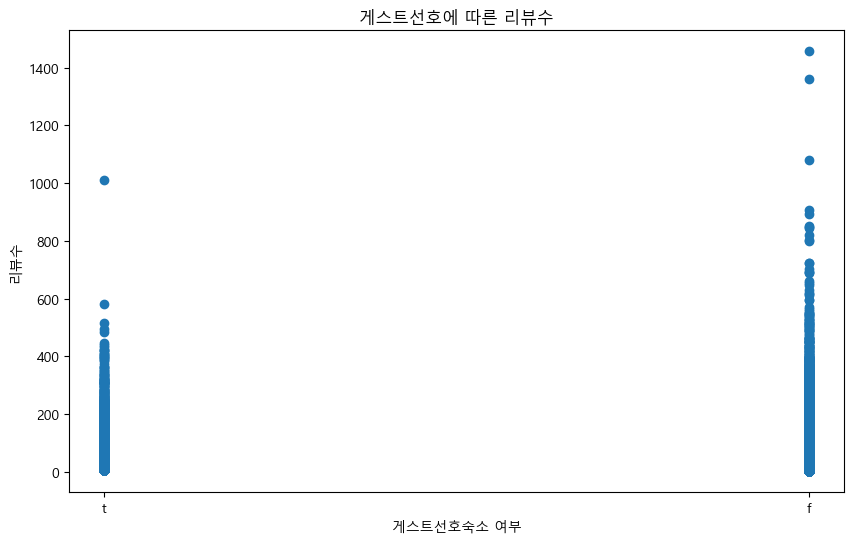

In [29]:
#게스트선호에 따른 리뷰수 
plt.figure(figsize=(10, 6))
plt.scatter(london_lists['게스트선호'], london_lists['리뷰수'], alpha=1)
plt.title('게스트선호에 따른 리뷰수')
plt.xlabel('게스트선호숙소 여부')
plt.ylabel('리뷰수')
plt.show()

게스트선호인 숙소가 몇개 없어서 적게 나타나는거 같다

In [30]:
sns.pairplot(london_lists, vars=['리뷰수', '리뷰점수', '숙소_가격', '수용_인원수'], height=2.5, hue='게스트선호')
plt.show()

In [ ]:
# london_lists['게스트선호'] = london_lists['게스트선호'].replace({'t' : 1, 'f':0}) #인코딩 

In [ ]:
london_lists_corr = london_lists[['리뷰점수','리뷰수','숙소_가격','숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수',
       '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수','수용_인원수']]

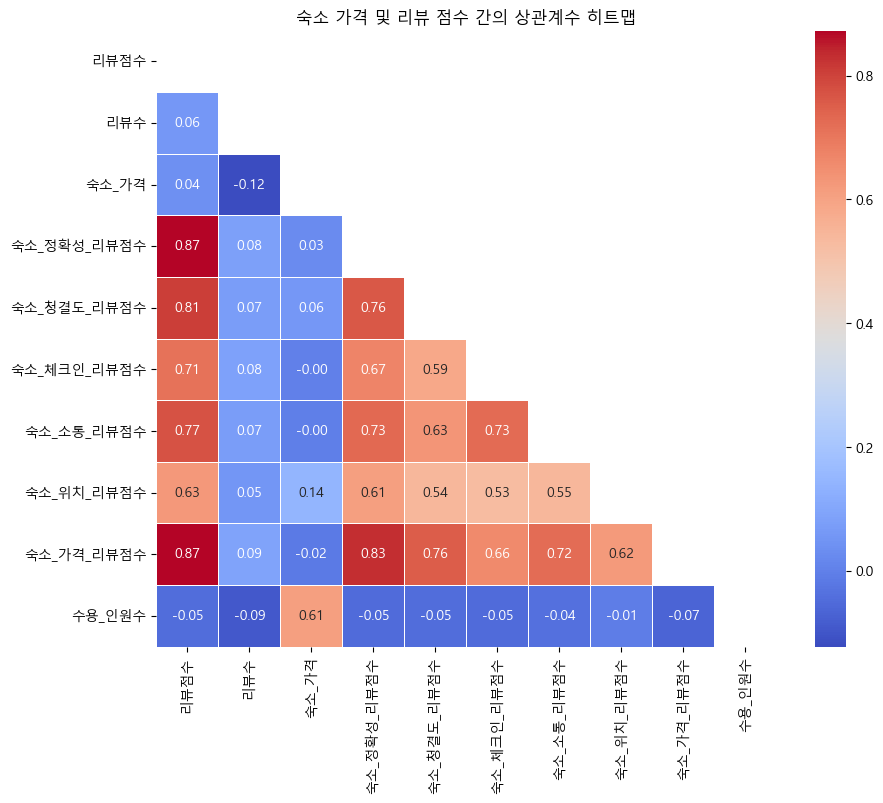

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.executable

# 데이터프레임의 상관관계 계산
corr = london_lists_corr.corr()


# 마스크 생성 (상단 삼각형)
mask = np.triu(np.ones_like(corr, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(10, 8))  # 그래프의 크기 설정
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('숙소 가격 및 리뷰 점수 간의 상관계수 히트맵')  # 그래프 제목 설정
plt.show()

게스트 선호가 t인 각 리뷰점수들 간의 상관관계

In [ ]:
guest_1_scores = london_lists[london_lists['게스트선호'] == 't'][['리뷰점수','숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수',
       '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수']]

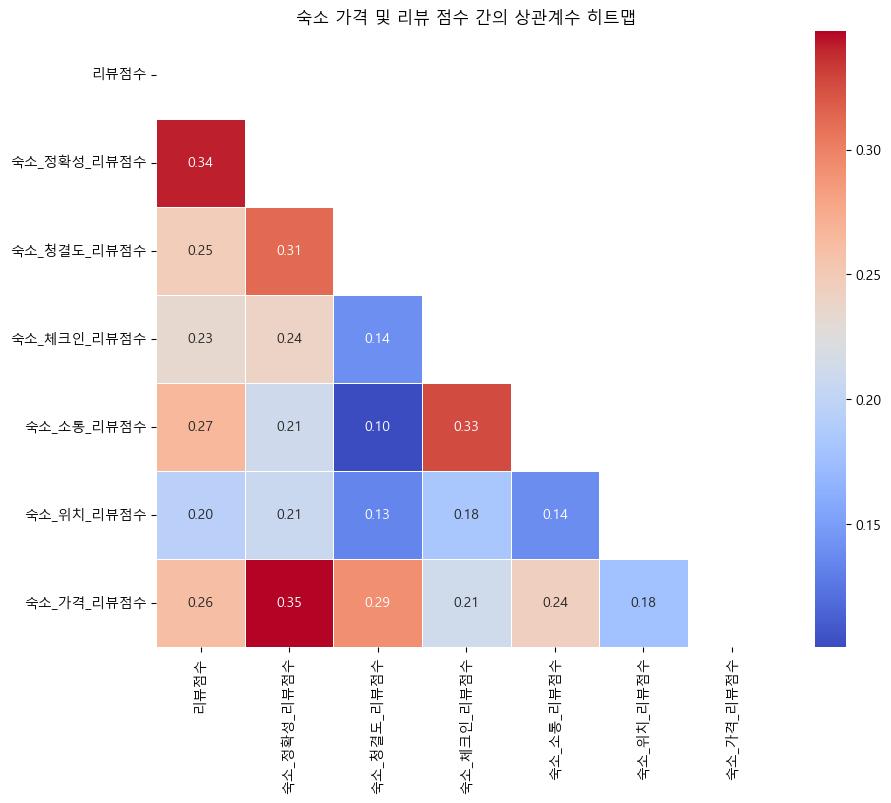

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.executable

# 데이터프레임의 상관관계 계산
corr = guest_1_scores.corr()


# 마스크 생성 (상단 삼각형)
mask = np.triu(np.ones_like(corr, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(10, 8))  # 그래프의 크기 설정
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('숙소 가격 및 리뷰 점수 간의 상관계수 히트맵')  # 그래프 제목 설정
plt.show()

게스트 선호가 0인 각 리뷰점수들 간의 상관관계

In [ ]:
guest_0_scores = london_lists[london_lists['게스트선호'] == 'f'][['리뷰점수','숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수',
       '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수']]

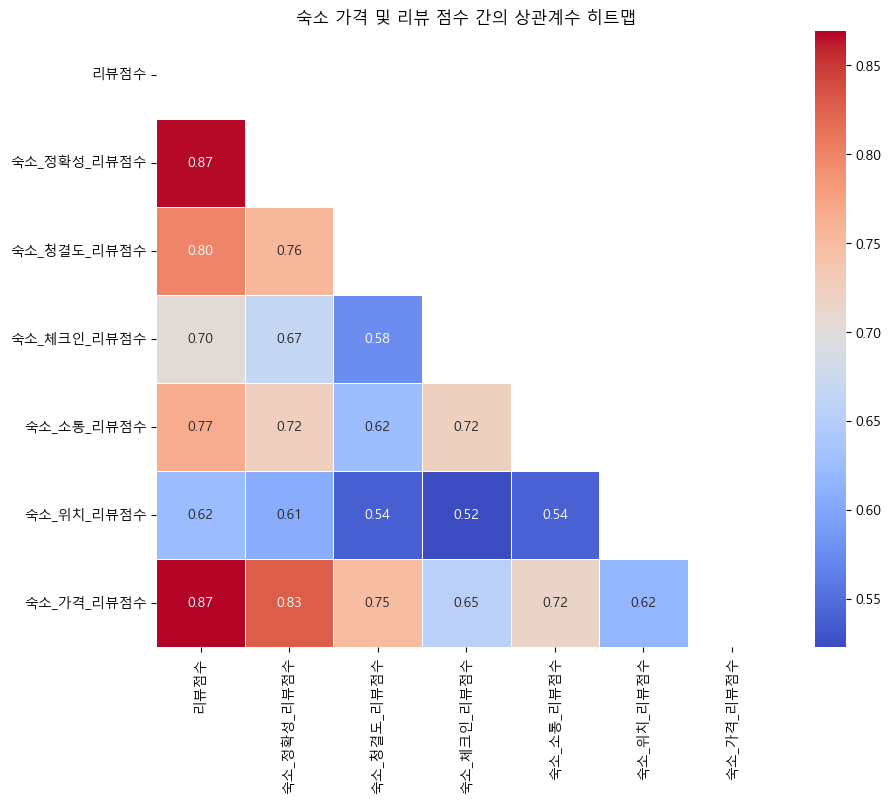

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.executable

# 데이터프레임의 상관관계 계산
corr = guest_0_scores.corr()


# 마스크 생성 (상단 삼각형)
mask = np.triu(np.ones_like(corr, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(10, 8))  # 그래프의 크기 설정
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('숙소 가격 및 리뷰 점수 간의 상관계수 히트맵')  # 그래프 제목 설정
plt.show()